Часть 4 ВКР Комаровой О.А. Продолжение 
Написать нейронную сеть, которая будет рекомендовать:
-	Соотношение матрица-наполнитель


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")
import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras as keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation 
from pandas import read_excel, DataFrame, Series 
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor 
from tensorflow.keras.models import Sequential 
from numpy.random import seed  

2.12.0


In [2]:
import pandas as pd
# читаем 2 excel files
data1 = pd.read_excel('X_bp.xlsx')
data2 = pd.read_excel('X_nup.xlsx')
  
# объединяем по индексу, тип объединения INNER
compozit = pd.merge(data1, data2, 
                   how='inner')
  
compozit.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [3]:
#Удаляем первый неинформативный столбец 
compozit.drop(['Unnamed: 0'], axis=1, inplace=True) 
#Посмотрим на первые 5 строк 
compozit.head() 

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
# Сформируем входы и выход для модели 
 
tv = compozit['Соотношение матрица-наполнитель'] 
tr_v = compozit.loc[:, compozit.columns != 'Соотношение матрица-наполнитель'] 
 
# Разбиваем выборки на обучающую и тестовую 
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 42) 

In [5]:
# Нормализуем данные 
 
x_train_n = tf.keras.layers.Normalization(axis =-1) 
x_train_n.adapt(np.array(x_train)) 

In [7]:
from keras.layers.attention.multi_head_attention import activation
from tensorflow.python.keras import models
#Нейронная сеть. Модель
model1 = Sequential()
model1.add(Dense(8, activation = 'relu', input_shape = (x_train.shape[1],)))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation = 'sigmoid')) # sigmoid, т к данные от 0 до 1
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# Компилируем сеть 
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model1.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

In [9]:
# И обучаем
history = model1.fit(x_train,
                    y_train,
                    epochs = 30,
                    validation_data = (x_train, y_train),
                    verbose = 1)

Epoch 1/30
23/23 [==============================] - 1s 8ms/step - loss: 9.3480 - mae: 2.9192 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 9.3437 - mae: 2.9185 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 3/30
23/23 [==============================] - 0s 2ms/step - loss: 9.3496 - mae: 2.9199 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 4/30
23/23 [==============================] - 0s 3ms/step - loss: 9.3435 - mae: 2.9192 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 5/30
23/23 [==============================] - 0s 3ms/step - loss: 9.3526 - mae: 2.9206 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 6/30
23/23 [==============================] - 0s 2ms/step - loss: 9.3444 - mae: 2.9192 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 9.3392 - mae: 2.9185 - val_loss: 9.3567 - val_mae: 2.9213
Epoch 8/30
23/23 [==============================] - 0s 3ms/step - loss: 9.3474 - mae: 2.91

In [10]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model1.predict(x_test).flatten() 

10/10 [==============================] - 0s 997us/step


In [11]:
#Проверяем, какая ошибка (средний модуль отклонения) получилась:

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

2.9514584546978697


In [12]:
# Среднее значение по выборке
print(np.mean(y_test))

2.9514584546978697


In [13]:
print('MAE: %.2f' % mean_absolute_error(y_test, pred)) # Средняя абсолютная ошибка (MAE)
print('MSE: %.2f' % mean_squared_error(y_test, pred)) # Средняя квадратичная ошибка(MSE)
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, pred))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error: %.2f' % median_absolute_error(y_test, pred)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2: %.2f' % r2_score(y_test, pred)) # Метрика R2 или Коэффициент детерминации

MAE: 2.95
MSE: 9.57
RMSE: 3.09
Median absolute error: 2.92
R^2: -10.16


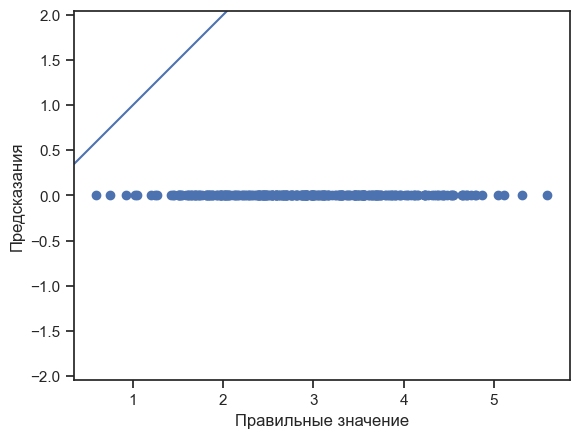

In [14]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [15]:
#Нейронная сеть. Модель 2
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid')) # sigmoid, т к данные от 0 до 1
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model2.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

In [17]:
# И обучаем
history = model2.fit(x_train,
                    y_train,
                    epochs = 30,
                    validation_data = (x_train, y_train),
                    verbose = 1)

Epoch 1/30
23/23 [==============================] - 0s 7ms/step - loss: 4.5430 - mae: 1.9347 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 3/30
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 4/30
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 5/30
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 6/30
23/23 [==============================] - 0s 2ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 8/30
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.92

In [18]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model2.predict(x_test).flatten() 

10/10 [==============================] - 0s 776us/step


In [19]:
#Проверяем, какая ошибка (средний модуль отклонения) получилась:

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

1.9561890943631068


In [20]:
# Среднее значение по выборке
print(np.mean(y_test))

2.9514584546978697


In [21]:
print('MAE: %.2f' % mean_absolute_error(y_test, pred)) # Средняя абсолютная ошибка (MAE)
print('MSE: %.2f' % mean_squared_error(y_test, pred)) # Средняя квадратичная ошибка(MSE)
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, pred))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error: %.2f' % median_absolute_error(y_test, pred)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2: %.2f' % r2_score(y_test, pred)) # Метрика R2 или Коэффициент детерминации

MAE: 1.96
MSE: 4.67
RMSE: 2.16
Median absolute error: 1.92
R^2: -4.44


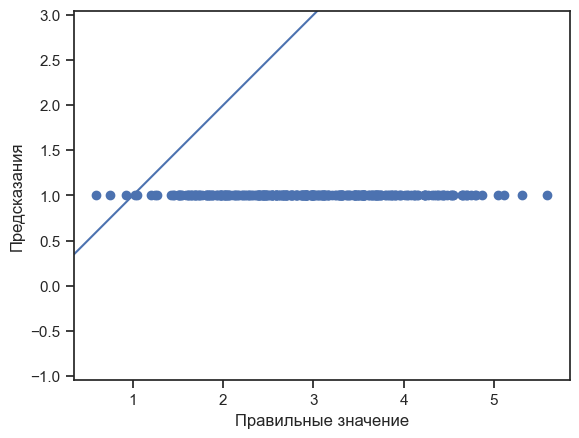

In [22]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [23]:
#Нейронная сеть. Модель 3
model3 = Sequential()
model3.add(Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation = 'sigmoid')) # sigmoid, т к данные от 0 до 1
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1664      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model3.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

In [25]:
# И обучаем
history = model3.fit(x_train,
                    y_train,
                    epochs = 300,
                    validation_data = (x_train, y_train),
                    verbose = 1)

Epoch 1/300
23/23 [==============================] - 0s 7ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 2/300
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 4/300
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 5/300
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 4.5202 - mae: 1.9300 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 7/300
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - mae: 1.9291 - val_loss: 4.5141 - val_mae: 1.9291
Epoch 8/300
23/23 [==============================] - 0s 3ms/step - loss: 4.5141 - m

In [26]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model3.predict(x_test).flatten() 

10/10 [==============================] - 0s 886us/step


In [27]:
#Проверяем, какая ошибка (средний модуль отклонения) получилась:

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

1.9561890943631068


In [28]:
# Среднее значение по выборке
print(np.mean(y_test))

2.9514584546978697


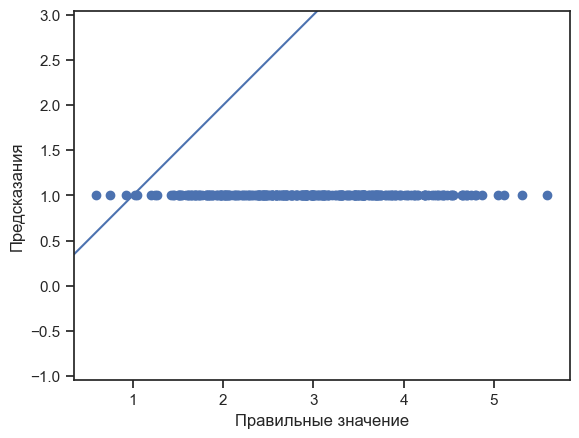

In [29]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [30]:
print('MAE: %.2f' % mean_absolute_error(y_test, pred)) # Средняя абсолютная ошибка (MAE)
print('MSE: %.2f' % mean_squared_error(y_test, pred)) # Средняя квадратичная ошибка(MSE)
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, pred))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error: %.2f' % median_absolute_error(y_test, pred)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2: %.2f' % r2_score(y_test, pred)) # Метрика R2 или Коэффициент детерминации

MAE: 1.96
MSE: 4.67
RMSE: 2.16
Median absolute error: 1.92
R^2: -4.44


In [31]:
#Нейронная сеть. Модель 4
model4 = Sequential()
model4.add(Dense(12, activation = 'relu', input_shape = (x_train.shape[1],)))
model4.add(Dense(1, activation = 'sigmoid')) # sigmoid, т к данные от 0 до 1
print(model4.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model4.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

In [33]:
# И обучаем
history = model4.fit(x_train,
                    y_train,
                    epochs = 100,
                    validation_data = (x_train, y_train),
                    verbose = 1)

Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 6.5763 - mae: 2.3502 - val_loss: 5.7588 - val_mae: 2.1784
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 5.4906 - mae: 2.1238 - val_loss: 5.2825 - val_mae: 2.0819
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 5.1469 - mae: 2.0536 - val_loss: 4.8556 - val_mae: 1.9967
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 4.7427 - mae: 1.9739 - val_loss: 4.7019 - val_mae: 1.9658
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 4.6891 - mae: 1.9626 - val_loss: 4.6707 - val_mae: 1.9580
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 4.6163 - mae: 1.9473 - val_loss: 4.5771 - val_mae: 1.9404
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 4.5763 - mae: 1.9402 - val_loss: 4.5718 - val_mae: 1.9389
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 4.5718 - m

In [34]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model4.predict(x_test).flatten() 

10/10 [==============================] - 0s 665us/step


In [35]:
#Проверяем, какая ошибка (средний модуль отклонения) получилась:

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

1.9594321319263002


In [36]:
# Среднее значение по выборке
print(np.mean(y_test))

2.9514584546978697


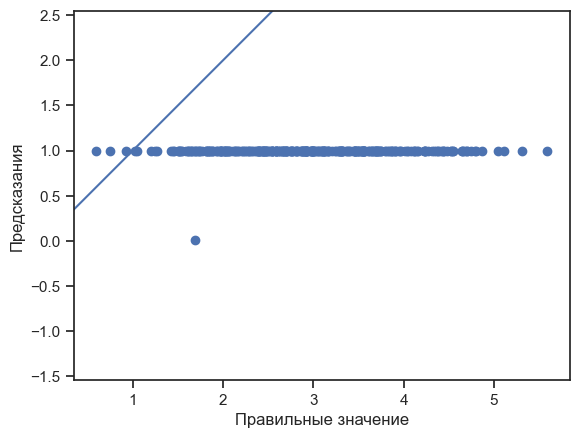

In [37]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [38]:
print('MAE: %.2f' % mean_absolute_error(y_test, pred)) # Средняя абсолютная ошибка (MAE)
print('MSE: %.2f' % mean_squared_error(y_test, pred)) # Средняя квадратичная ошибка(MSE)
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, pred))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error: %.2f' % median_absolute_error(y_test, pred)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2: %.2f' % r2_score(y_test, pred)) # Метрика R2 или Коэффициент детерминации

MAE: 1.96
MSE: 4.67
RMSE: 2.16
Median absolute error: 1.92
R^2: -4.45


Таким образом, не удалось получить модель, хорошо делающей прогноз.